# Wflow SBM Calibration period results
## Plot best parameters and objective functions

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

import string
import cartopy
import cartopy.crs as ccrs
import seaborn as sns
import matplotlib
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

from pathlib import Path
from glob import glob

## Set Paths

In [2]:
# Set Paths
ROOT = Path("/gpfs/work1/0/wtrcycle/users/jaerts/camels_uk/")
AUXDATA = Path(f"{ROOT}/aux_data")
RESULTS = Path(f"{ROOT}/results/wflow_sbm/")

## Set Config

In [3]:
# Set Files
basins_shp = f"{AUXDATA}/CAMELS-GB/data/CAMELS_GB_catchment_boundaries/CAMELS_GB_catchment_boundaries.shp"
results_csv = f"{RESULTS}/wflow_calibration_objective_function_overview.csv"

# Load available basin_IDs
df_basin_ids = pd.read_csv(f"{AUXDATA}/available_basin_ids_uncertainty.csv", index_col='basin_id')

## Read basin boundary shapefile

In [4]:
# Read shapefile
gdf = gpd.read_file(basins_shp)
gdf = gdf.set_index('ID_STRING')
gdf.index = gdf.index.astype(int)

# Reproject shapefile
gdf = gdf.to_crs({'init':'epsg:4326'})
gdf['centroid'] = gdf.centroid.to_crs("EPSG:4326")

/home/jaerts/miniconda3/envs/wflow_state_flux/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/scratch-local/jaerts.2598960/ipykernel_3559243/1606819374.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['centroid'] = gdf.centroid.to_crs("EPSG:4326")


## Load results dataframe

In [5]:
# Load results dataframe
df = pd.read_csv(results_csv, index_col='basin_id')
df = df_basin_ids.join(df, rsuffix='_id')

# Merge results and shapefile
gdf_results = gdf.merge(df, left_index=True, right_index=True, how="inner")
gdf_results = gdf_results.set_geometry("centroid")

## Plot best calibration parameter and objective function

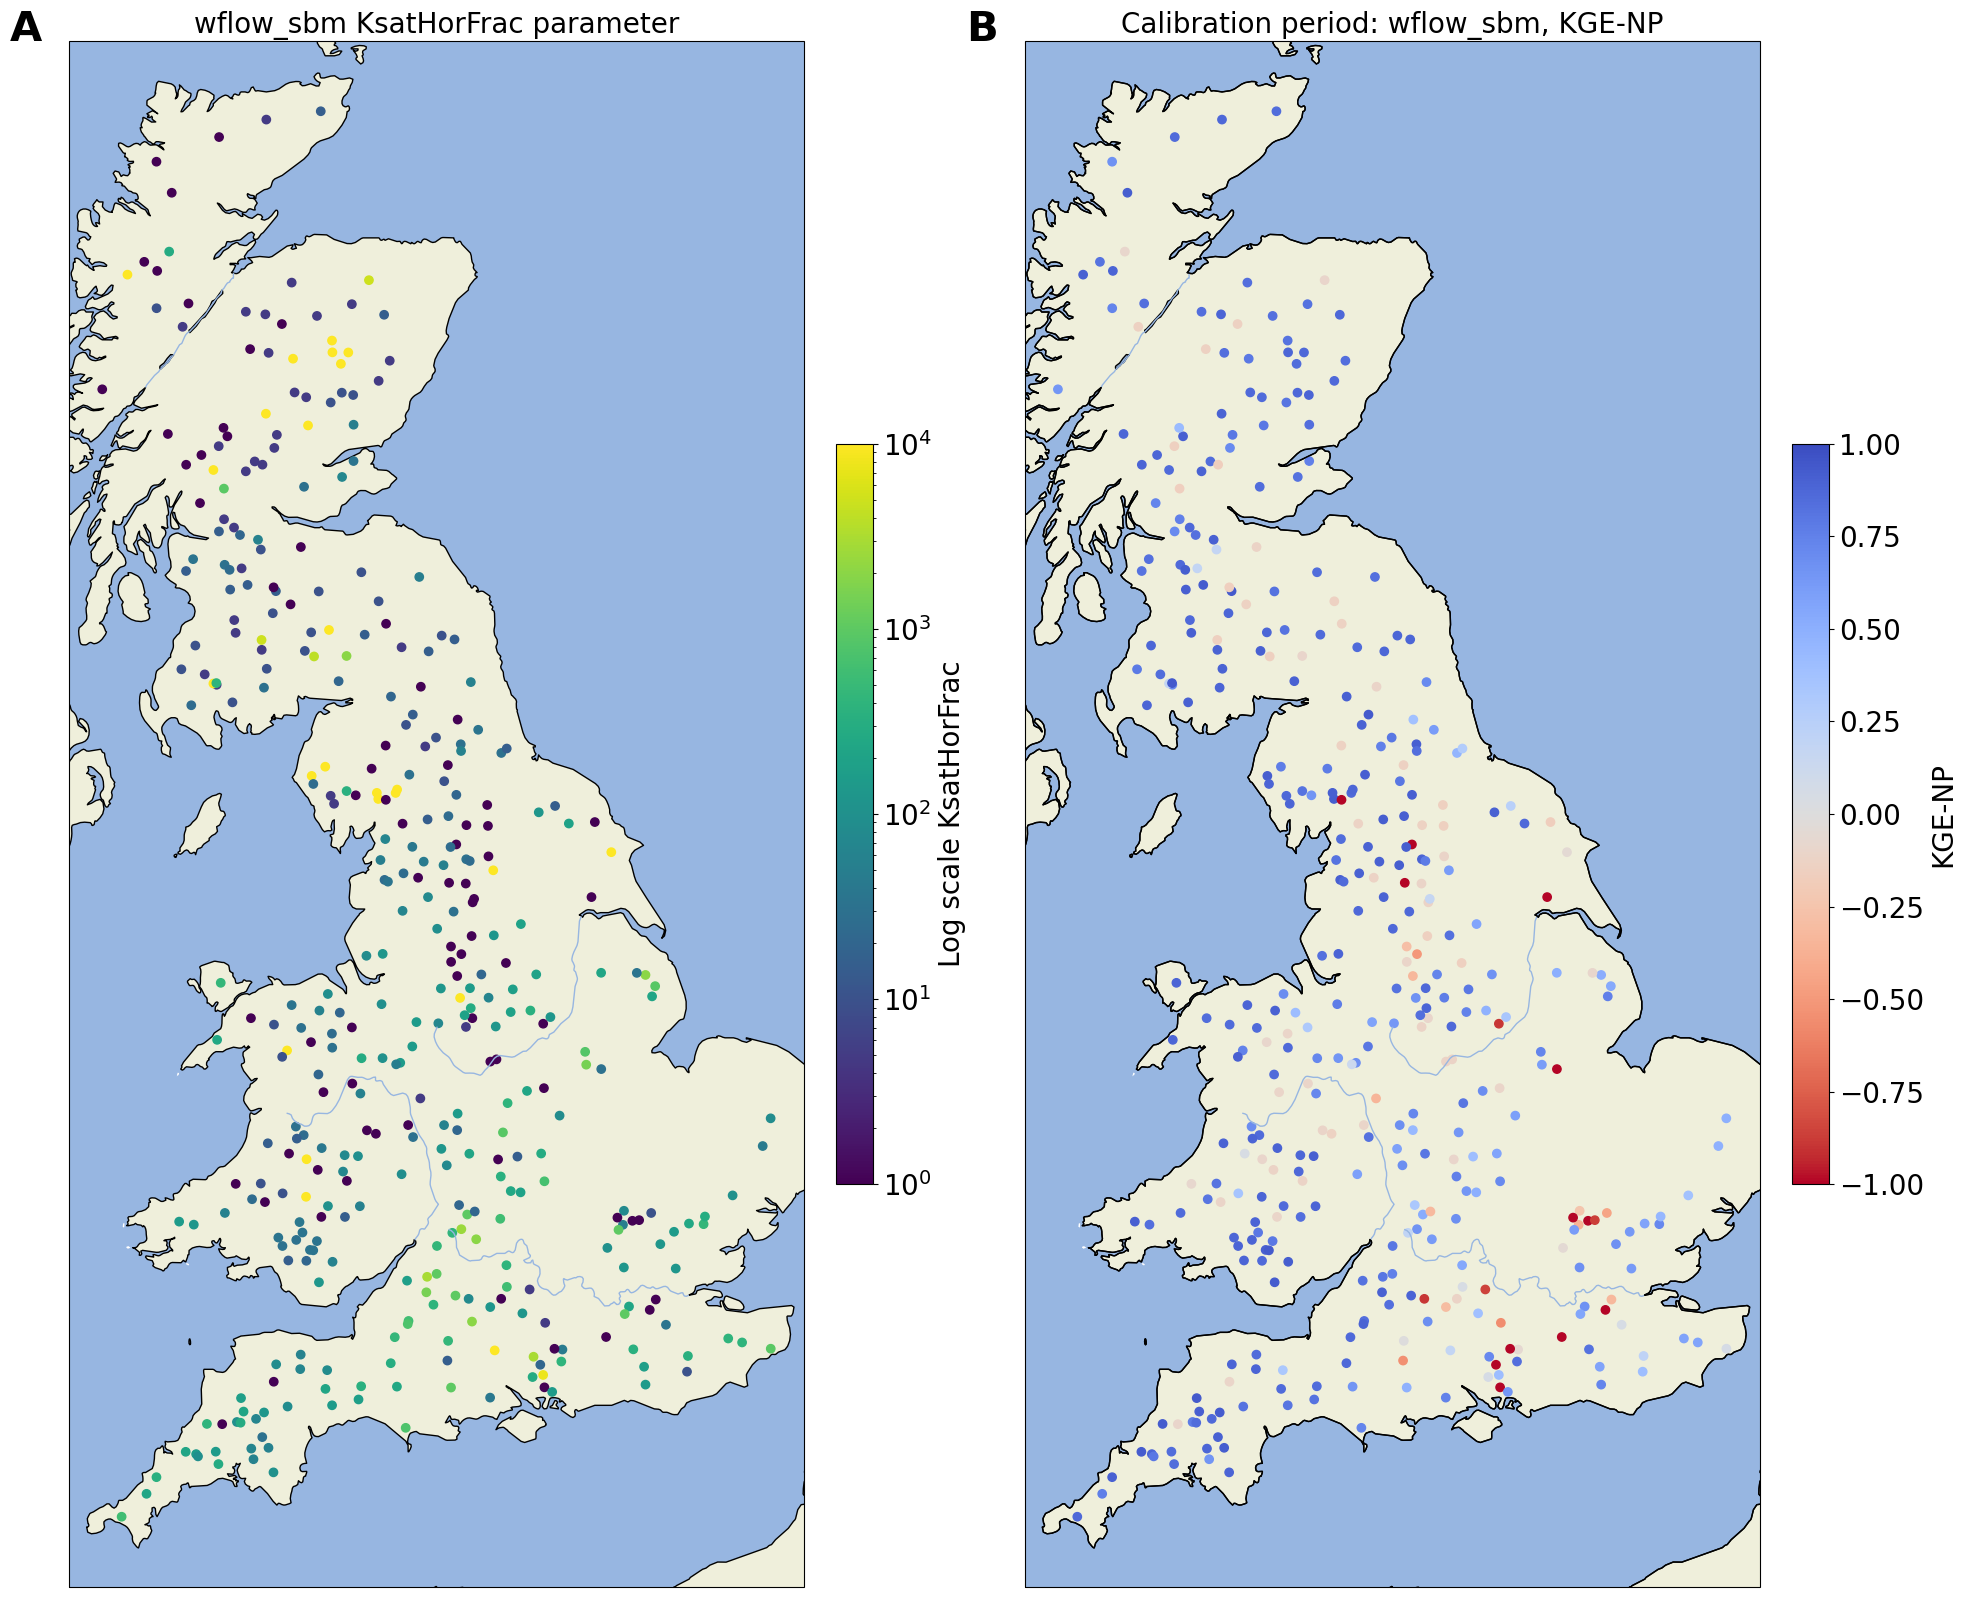

In [8]:
matplotlib.rcParams.update({'font.size': 20})

fig, axes = plt.subplots(1, 2,figsize=(20, 30), subplot_kw={"projection": ccrs.PlateCarree()})

colormap1 = 'gnuplot2'
colormap1 = 'coolwarm_r'

ax2 = gdf_results.plot(ax=axes[1], column='kge_np',
                        cmap=colormap1,
                        vmin=-1.0,
                        vmax=1.0,
                        legend=True,
                        legend_kwds={'label': "KGE-NP",
                                     'orientation': "vertical",
                                      # "shrink":.5
                                     "fraction":0.046,
                                     "pad":0.04,
                                    })

ax2.add_feature(cartopy.feature.OCEAN)
ax2.add_feature(cartopy.feature.LAND, edgecolor='black')
ax2.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax2.add_feature(cartopy.feature.RIVERS)

ax2.coastlines(resolution='10m')

colormap2 = 'viridis'

ax1 = gdf_results.plot(ax=axes[0], column='ksathorfrac',
                      norm=matplotlib.colors.LogNorm(vmin=gdf_results.ksathorfrac.min(),
                                                     vmax=gdf_results.ksathorfrac.max()),
                        cmap=colormap2,
                        vmax=100,
                        legend=True,
                        legend_kwds={'label': "Log scale KsatHorFrac",
                                     'orientation': "vertical",
                                      # "shrink":.5
                                     "fraction":0.046,
                                     "pad":0.04}
                      )

ax1.add_feature(cartopy.feature.OCEAN)
ax1.add_feature(cartopy.feature.LAND, edgecolor='black')
ax1.add_feature(cartopy.feature.LAKES, edgecolor='black')
ax1.add_feature(cartopy.feature.RIVERS)

ax1.set_title('wflow_sbm KsatHorFrac parameter', size=20)
ax2.set_title('Calibration period: wflow_sbm, KGE-NP', size=20)


axes[0].text(-0.08,1, string.ascii_uppercase[0], transform=axes[0].transAxes, 
            size=30, weight='bold')
axes[0].text(-0.08,1, string.ascii_uppercase[1], transform=axes[1].transAxes, 
            size=30, weight='bold')

plt.tight_layout()
plt.savefig(f'{ROOT}/plots/A1_calibration_results_wflow_sbm_UK.png', bbox_inches='tight', dpi=300)